<center><img src="http://alacip.org/wp-content/uploads/2014/03/logoEscalacip1.png" width="500"></center>


<center> <h1>Curso: Introducción al Python</h1> </center>

<br></br>

* Profesor:  <a href="http://www.pucp.edu.pe/profesor/jose-manuel-magallanes/" target="_blank">Dr. José Manuel Magallanes, PhD</a> ([jmagallanes@pucp.edu.pe](mailto:jmagallanes@pucp.edu.pe))<br>
    - Profesor del **Departamento de Ciencias Sociales, Pontificia Universidad Católica del Peru**.<br>
    - Senior Data Scientist del **eScience Institute** and Visiting Professor at **Evans School of Public Policy and Governance, University of Washington**.<br>
    - Fellow Catalyst, **Berkeley Initiative for Transparency in Social Sciences, UC Berkeley**.


## Parte 6:  Redes sociales en Python

Finalmente, veamos como usar información de Twitter para analizar redes sociales:

<a id='part1'></a>
## 1. Llamando al API

In [7]:
import json

# get the security info from file
keysAPI = json.load(open('data/keysAPI.txt','r'))

import tweepy

# recovering security info
consumer_key = keysAPI['consumer_key']
consumer_secret = keysAPI['consumer_secret']
access_token = keysAPI['access_token']
access_token_secret = keysAPI['access_token_secret']

auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api=tweepy.API(auth, retry_count=5,
               retry_delay=10,
               retry_errors=set([401, 404, 500, 503]),
               wait_on_rate_limit=True,
               wait_on_rate_limit_notify=True,
               parser=tweepy.parsers.JSONParser())

Con el API listo, traigamos la red:

1. Usemos **networkx** para armar la red:

In [8]:
import networkx as nx

amix = nx.DiGraph()

2. Indiquemos los NODOS de la red:

In [9]:
famosos=['pontifex_es','ernestosamperp','mbachelet','NicolasMaduro','mashirafael','lopezobrador_','realDonaldTrump',
        'ppkamigo','evoespueblo','jairbolsonaro']


3. Creemos todas las combinaciones:

In [10]:
import itertools

pares=itertools.combinations(famosos,2)

4. Para cada par, veamos quien sigue a quien:

In [11]:
for poli_1,poli_2 in pares:
    
    Amistad=api.show_friendship(source_screen_name=poli_1,target_screen_name=poli_2)
    realAmistad=Amistad['relationship']['source']['following'], Amistad['relationship']['target']['following']    
    
    # se siguen mutuamente
    if realAmistad[0] and realAmistad[1]:
        amix.add_edge(poli_1, poli_2, color='r',weight=6)
        amix.add_edge(poli_2, poli_1, color='r',weight=6)

    # poli1 sigue a poli2
    if realAmistad[0] and not realAmistad[1]:
        amix.add_edge(poli_1, poli_2,color='grey',weight=2)

    # poli2 sigue a poli1
    if not realAmistad[0] and realAmistad[1]:
        amix.add_edge(poli_2, poli_1,color='grey',weight=2)

5. Guardemos la red

In [12]:
nx.write_graphml(amix, "amistades.graphml")

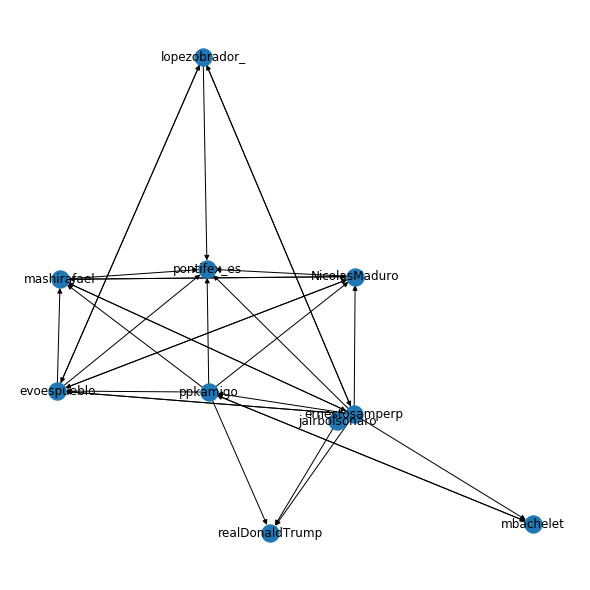

In [42]:
# Here you can visualize your import:
import matplotlib.pyplot as plot
# very important
%matplotlib inline 

plot.figure(figsize=(8,8)) 
nx.draw_kamada_kawai(amix,arrows =True,with_labels=True)

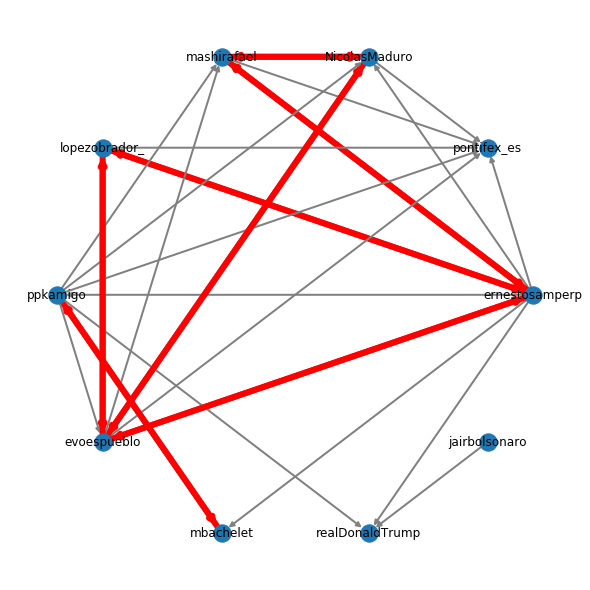

In [44]:
pos = nx.circular_layout(amix)

edges = amix.edges(data=True)

colors = [c['color'] for [u,v,c] in amix.edges(data=True)]

weights = [c['weight'] for [u,v,c] in amix.edges(data=True)]

plot.figure(figsize=(8,8)) 
nx.draw(amix, pos, edges=edges, edge_color=colors, width=weights,with_labels=True)

### 2. 1 Exploring the NETWORK

Is this network of businessmen **connected**?

If not connected, it means there are sub groups that do not interact with each other.

Visuals can help:

As this context does not have ONE connected network but several components, we can pay attention to the Giant Component:

**Knowing this network (Giant Component)**

In [81]:
#number of nodes
len(amix.nodes())

10

In [82]:
#number of edges
len(amix.edges())

30

In [75]:
# Density: 
#from 0 to 1, where 1 makes it a 'complete' network: there is a link between every pair of nodes.
nx.density(amix) 

0.3333333333333333

In [76]:
# Clustering coefficient of a node is away to measure if my own connections are connected among them.
# The average clustering coefficiente tells you the average of those values.
nx.average_clustering(amix)

0.43881616434248016

In [77]:
# Shorter path (average)
# shows the average number of steps it takes to get from one node to another.

nx.average_shortest_path_length(amix)

0.9888888888888889

* **Random networks** have *small shortest path* and *small clustering coefficient*...Is this the case?
* The high clustering coefficient would suggest a **small world**, as most nodes are not neighbors of one another, but most nodes can be reached from every other in few steps.

In [79]:
# Transitivity

# How probable is that two business men with a common business friend, are also friends.
nx.transitivity(amix)

0.3790322580645161

In [83]:
# Assortativity (degree)
# A measure to see if nodes are connecting to other nodes similar in degree.  
# closer to 1 means higher assortativity, closer to -1 diassortativity; while 0 no assortitivity.
nx.degree_assortativity_coefficient(amix)

-0.12779660533691284

In [ ]:
# you can also compute assortativity using an attribute of interest.
#nx.attribute_assortativity_coefficient(NWfromMatrix_giant,'Multinacional')

More plotting:

In [ ]:
# coloring the nodes by attribute:
color_map = plt.get_cmap("cool")  # color palette
valuesForColors=[n[1]['Multinacional'] for n in NWfromMatrix_giant.nodes(data=True)]
net.draw_networkx(NWfromMatrix_giant,cmap=color_map,node_color=valuesForColors)

### 2.2 Exploration of network communities

A **clique** can be understood a community of nodes that are well connected.

In [89]:
# How many cliques
nx.graph_number_of_cliques(amix.to_undirected())

5

In [92]:
for c in nx.enumerate_all_cliques(amix.to_undirected()):
    print (c)

['ernestosamperp']
['pontifex_es']
['NicolasMaduro']
['mashirafael']
['lopezobrador_']
['ppkamigo']
['evoespueblo']
['mbachelet']
['realDonaldTrump']
['jairbolsonaro']
['ernestosamperp', 'pontifex_es']
['ernestosamperp', 'NicolasMaduro']
['ernestosamperp', 'mashirafael']
['ernestosamperp', 'lopezobrador_']
['ernestosamperp', 'ppkamigo']
['ernestosamperp', 'evoespueblo']
['ernestosamperp', 'mbachelet']
['ernestosamperp', 'realDonaldTrump']
['pontifex_es', 'NicolasMaduro']
['pontifex_es', 'mashirafael']
['pontifex_es', 'lopezobrador_']
['pontifex_es', 'ppkamigo']
['pontifex_es', 'evoespueblo']
['NicolasMaduro', 'mashirafael']
['NicolasMaduro', 'ppkamigo']
['NicolasMaduro', 'evoespueblo']
['mashirafael', 'ppkamigo']
['mashirafael', 'evoespueblo']
['lopezobrador_', 'evoespueblo']
['ppkamigo', 'evoespueblo']
['ppkamigo', 'mbachelet']
['ppkamigo', 'realDonaldTrump']
['realDonaldTrump', 'jairbolsonaro']
['ernestosamperp', 'pontifex_es', 'NicolasMaduro']
['ernestosamperp', 'pontifex_es', 'mash

In [93]:
# the number of nodes in the biggeest cliques
max([len(c) for c in nx.enumerate_all_cliques(amix.to_undirected())])

6

In [94]:
# which are:
[c for c in nx.enumerate_all_cliques(amix.to_undirected()) if len(c) == 6]

[['ernestosamperp',
  'pontifex_es',
  'NicolasMaduro',
  'mashirafael',
  'ppkamigo',
  'evoespueblo']]

In [88]:
# COMMUNITY DETECTION (set of nodes densely connected internally)

# based on: https://perso.uclouvain.be/vincent.blondel/research/louvain.html
# pip install python-louvain

import community 
parts = community.best_partition(amix.to_undirected())
parts

{'ernestosamperp': 0,
 'pontifex_es': 0,
 'NicolasMaduro': 0,
 'mashirafael': 0,
 'lopezobrador_': 0,
 'ppkamigo': 1,
 'evoespueblo': 0,
 'mbachelet': 1,
 'realDonaldTrump': 1,
 'jairbolsonaro': 1}

'parts' is a dictionary, so we can use it to add an attribute:

In [97]:
nx.set_node_attributes(amix, 'community', parts)

TypeError: unhashable type: 'dict'

In [ ]:
pos=net.spring_layout(NWfromMatrix, k=0.2) 

valuesForColors=[n[1]['community'] for n in NWfromMatrix_giant.nodes(data=True)]

plot.axis("off")
net.draw_networkx_nodes(NWfromMatrix_giant,pos,cmap = plt.get_cmap("cool"), node_color = valuesForColors, 
                  node_size = 50, with_labels = False)

# edges
net.draw_networkx_edges(NWfromMatrix_giant,pos,width=1.0,alpha=0.2)

### 2.3 Node level exploration

In [99]:
#Central nodes: degree

from operator import itemgetter
NodeDegree=sorted(amix.to_undirected().degree().items(), key=itemgetter(1),reverse=True)
NodeDegree[:5]

AttributeError: 'DegreeView' object has no attribute 'items'

In [ ]:
# Ego network of Hub?
HubNode,HubDegree=NodeDegree[0]
HubEgonet=net.ego_graph(NWfromMatrix_giant,HubNode)
pos=net.spring_layout(HubEgonet)
net.draw_networkx(HubEgonet,pos,node_color='b',node_size=800,with_labels=True, alpha=0.5,node_shape='^')
net.draw_networkx_nodes(HubEgonet,pos,nodelist=[HubNode],node_size=2000,node_color='r')

In [100]:
# minimum number of nodes that must be removed to disconnect the network?
nx.node_connectivity(amix)

0

In [103]:
#who can break the network?
list(nx.articulation_points(amix.to_undirected()))

['realDonaldTrump']

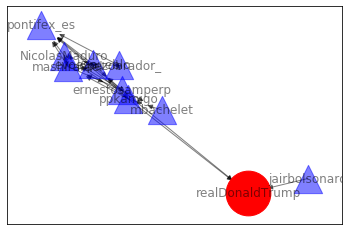

In [106]:
# Ego network of articulation node?
pos=nx.spring_layout(amix,k=0.5)
nx.draw_networkx(amix,pos,node_color='b',node_size=800,with_labels=True, alpha=0.5,node_shape='^')
nx.draw_networkx_nodes(amix,pos,nodelist=['realDonaldTrump'],node_size=2000,node_color='r')

In [ ]:
# Computing centrality measures:
degr=net.degree_centrality(NWfromMatrix_giant)  # based on connections count
clos=net.closeness_centrality(NWfromMatrix_giant) # "speed" to access the rest
betw=net.betweenness_centrality(NWfromMatrix_giant) # "control flow" among the network nodes
eige=net.eigenvector_centrality(NWfromMatrix_giant) # central nodes connected to central nodes (influential?)

In [ ]:
# measures into a data frame:
Centrality=[ [rich, degr[rich],clos[rich],betw[rich],eige[rich]] for rich in NWfromMatrix_giant]
headers=['Businessman','Degree','Closeness','Betweenness','Eigenvector']
DFCentrality=pandas.DataFrame(Centrality,columns=headers)

In [ ]:
DFCentrality.head()

Representing these nodes (step by step):

In [ ]:
plot.scatter(DFCentrality.Betweenness, DFCentrality.Closeness)

In [ ]:
# size of dot
plot.scatter(DFCentrality.Betweenness, DFCentrality.Closeness,s=(DFCentrality.Degree+1.3)**14)

In [ ]:
plot.figure(figsize=(20,20)) # size of plot
plot.scatter(DFCentrality.Betweenness, DFCentrality.Closeness,s=(DFCentrality.Degree+1.3)**14)

In [ ]:
# color of point
plot.figure(figsize=(20,20))
plot.scatter(DFCentrality.Betweenness, DFCentrality.Closeness,s=(DFCentrality.Degree+1.3)**14,
c=DFCentrality.Eigenvector,cmap=plt.get_cmap('YlOrRd'))

In [ ]:

plot.figure(figsize=(20,20))
plot.scatter(DFCentrality.Betweenness, DFCentrality.Closeness,s=(DFCentrality.Degree+1.3)**14,
c=DFCentrality.Eigenvector,cmap=plt.get_cmap('YlOrRd'))


# ANNOTATING DOTS:

for i in range(len(DFCentrality.index)):
    plot.annotate(DFCentrality['Businessman'][i], 
                  (DFCentrality['Betweenness'][i],DFCentrality['Closeness'][i]),
                  fontsize=18,color="orange")

In [ ]:
plot.figure(figsize=(20,20))
plot.scatter(DFCentrality.Betweenness, DFCentrality.Closeness,s=(DFCentrality.Degree+1.3)**14,
c=DFCentrality.Eigenvector,cmap=plt.get_cmap('YlOrRd'))

for i in range(len(DFCentrality.index)):
    plot.annotate(DFCentrality['Businessman'][i], 
                  (DFCentrality['Betweenness'][i],DFCentrality['Closeness'][i]),
                  fontsize=18,color="orange")

# TITLES:

plot.title("scatterplot (size for degree of node, color for eigenvalue)")
plot.xlabel("betweenness")
plot.ylabel("closeness")

<a id='part3'></a>
## 3. Exporting the Network

In [ ]:
#net.write_graphml(NWfromMatrix, "data/ElitePeru.graphml",encoding='utf-8')
net.write_gexf(NWfromMatrix, "data/ElitePeru.gexf",encoding='utf-8')

In [ ]:
type(NWfromMatrix.nodes(data=True)[1][1]["Multinacional"])

In [ ]:
for i in range(len(NWfromMatrix.nodes(data=True))):
    NWfromMatrix.nodes(data=True)[i][1]["Multinacional"]=int(NWfromMatrix.nodes(data=True)[i][1]["Multinacional"])

In [ ]:
net.write_graphml(NWfromMatrix, "data/ElitePeru.graphml",encoding='utf-8')
net.write_gexf(NWfromMatrix, "data/ElitePeru.gexf",encoding='utf-8')

In [ ]:
NWfromMatrix.nodes(data=True)

Another alternative to export the network:

In [ ]:
import csv

# edges
with open('data/ElitePeru.csv', 'w') as fileEdgeList:
    wr = csv.writer(fileEdgeList , delimiter=',')
    row="from","to","weight"
    wr.writerow(row)
    for node1,node2,edgeDict in NWfromMatrix.edges(data=True):
        row=node1,node2,edgeDict['weight']
        wr.writerow(row)

In [ ]:
with open('data/ElitePeru_att.csv', 'w') as fileNodeAttributes:
    wr = csv.writer(fileNodeAttributes, delimiter=',')
    row='Empresario','Multinacional'
    wr.writerow(row)
    for node,nodeDict in NWfromMatrix.nodes(data=True):
        row=node,nodeDict['Multinacional']
        wr.writerow(row)

_____

**AUSPICIO**: 

* El desarrollo de estos contenidos ha sido posible gracias al grant del Berkeley Initiative for Transparency in the Social Sciences (BITSS) at the Center for Effective Global Action (CEGA) at the University of California, Berkeley


<center>
<img src="https://www.bitss.org/wp-content/uploads/2015/07/bitss-55a55026v1_site_icon.png" style="width: 200px;"/>
</center>

* Este curso cuenta con el auspicio de:


<center>
<img src="https://www.python.org/static/img/psf-logo@2x.png" style="width: 500px;"/>
</center>



**RECONOCIMIENTO**


EL Dr. Magallanes agradece a la Pontificia Universidad Católica del Perú, por su apoyo en la participación en la Escuela ALACIP.

<center>
<img src="https://dci.pucp.edu.pe/wp-content/uploads/2014/02/Logotipo_colores-290x145.jpg" style="width: 400px;"/>
</center>


El autor reconoce el apoyo que el eScience Institute de la Universidad de Washington le ha brindado desde el 2015 para desarrollar su investigación en Ciencia de Datos.

<center>
<img src="https://escience.washington.edu/wp-content/uploads/2015/10/eScience_Logo_HR.png" style="width: 500px;"/>
</center>

<br>
<br>